**Customer Segmentation and Insights for Targeted Marketing**

Data Collection and Loading

In [3]:
import pandas as pd
df = pd.read_csv("C:\\Users\\anufn\\Downloads\\Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data Cleaning

In [4]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

 Exploratory Data Analysis (EDA)

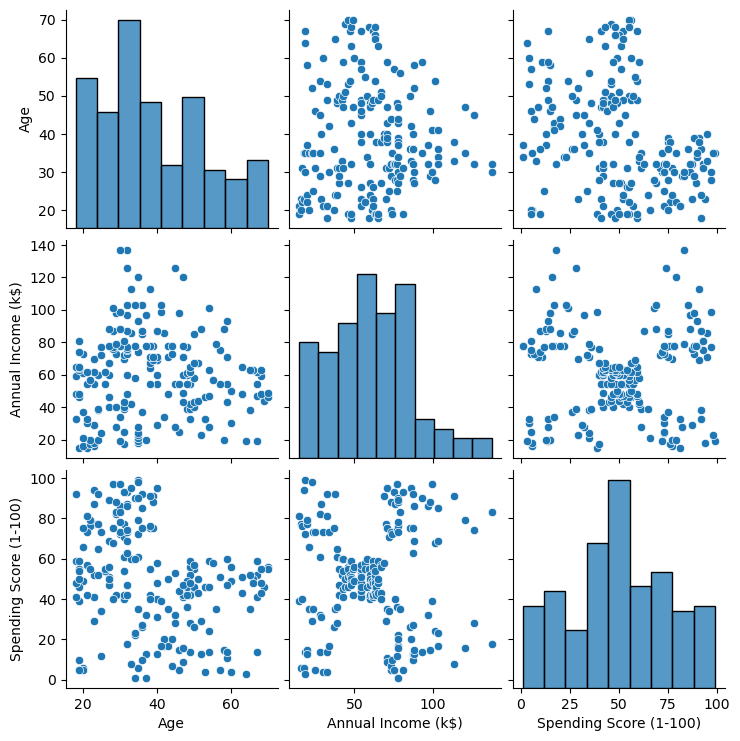

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

**Feature Selection**
Choose relevant features like:

Age

Gender (optional)

Annual Income

Spending Score

Scale the features with StandardScaler.



Determine Optimal Clusters (Elbow Method)

C:\Users\anufn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anufn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anufn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anufn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

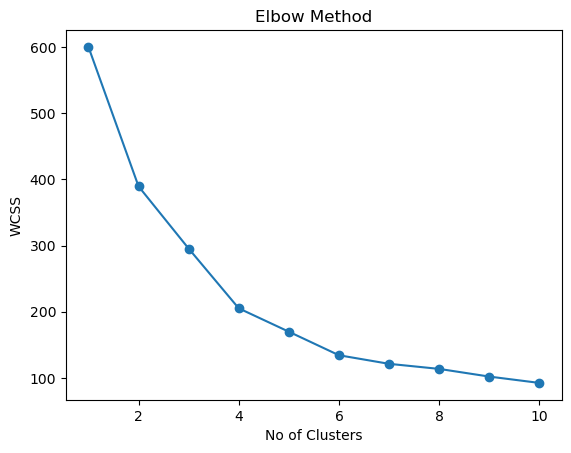

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

Build K-Means Model

In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\anufn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
Cluster Visualization

Text(0.5, 1.0, 'Customer Segments')

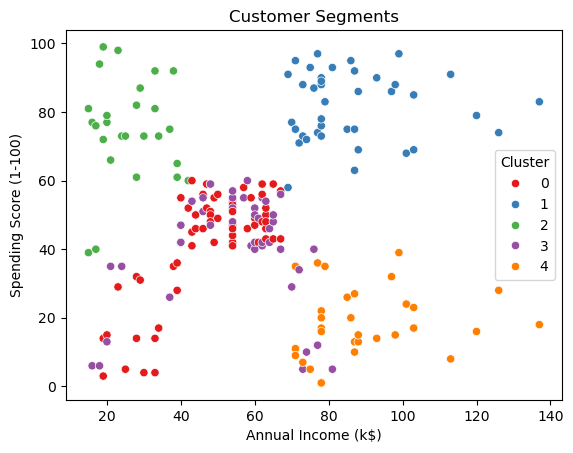

In [8]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments')


 **Segment Profiling**
Describe each cluster (age range, income level, spending habits).

Example:

Cluster 0: Young, high spenders

Cluster 1: Older, low income

Cluster 2: Middle age, average spenders



Distribution of Age, Income, Spending Score


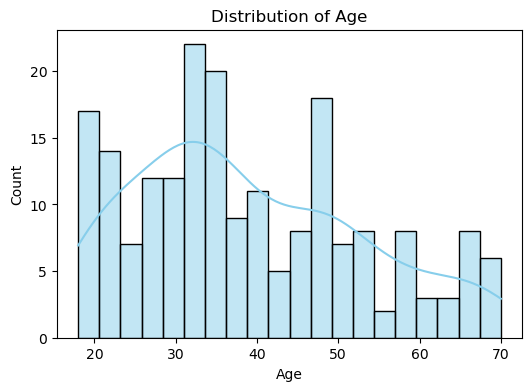

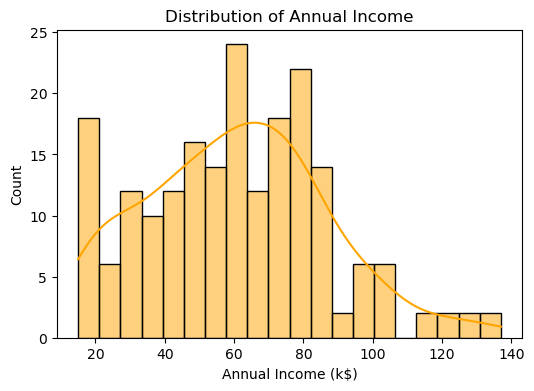

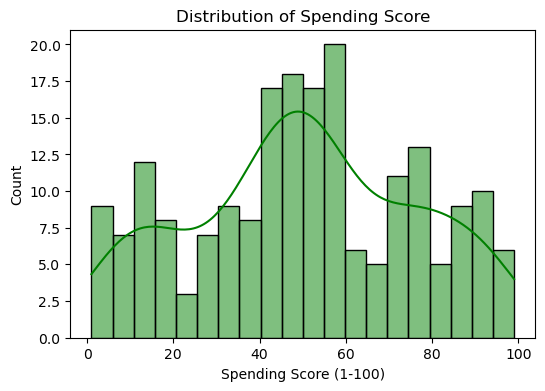

In [9]:

# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.show()

# Annual Income distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='orange')
plt.title('Distribution of Annual Income')
plt.show()

# Spending Score distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='green')
plt.title('Distribution of Spending Score')
plt.show()


Boxplots to Check Outliers

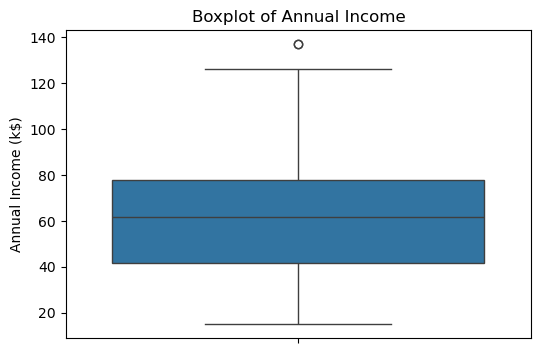

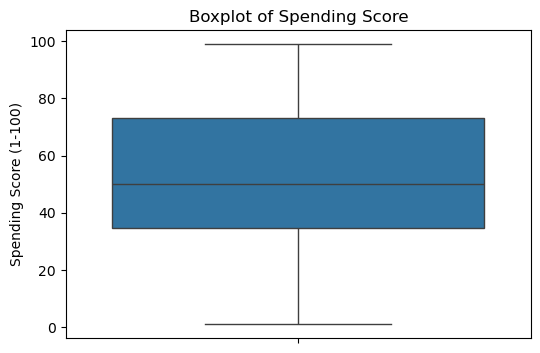

In [10]:
# Boxplot for Annual Income
plt.figure(figsize=(6,4))
sns.boxplot(y='Annual Income (k$)', data=df)
plt.title('Boxplot of Annual Income')
plt.show()

# Boxplot for Spending Score
plt.figure(figsize=(6,4))
sns.boxplot(y='Spending Score (1-100)', data=df)
plt.title('Boxplot of Spending Score')
plt.show()


Heatmap of Correlations

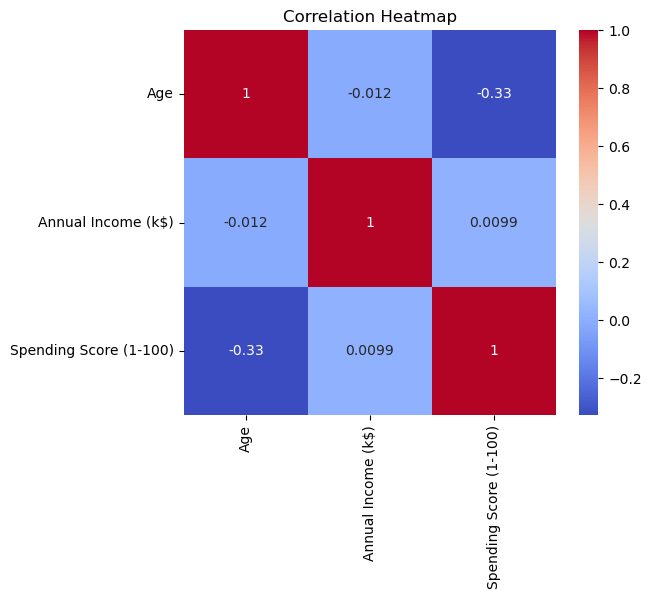

In [12]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Cluster Visualization (2D)

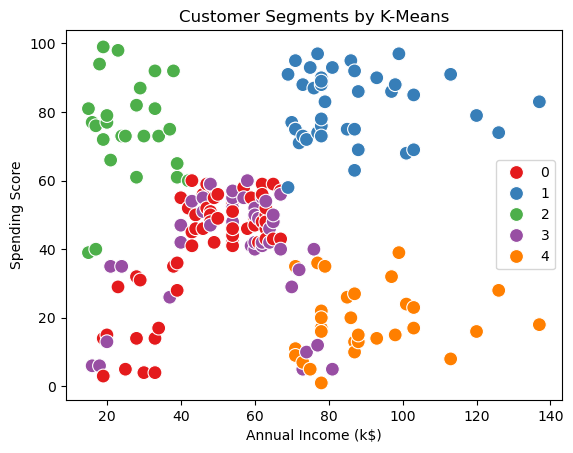

In [13]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', data=df, palette='Set1', s=100)
plt.title('Customer Segments by K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Count of Customers in Each Cluster

C:\Users\anufn\AppData\Local\Temp\ipykernel_19288\1846602001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='pastel')


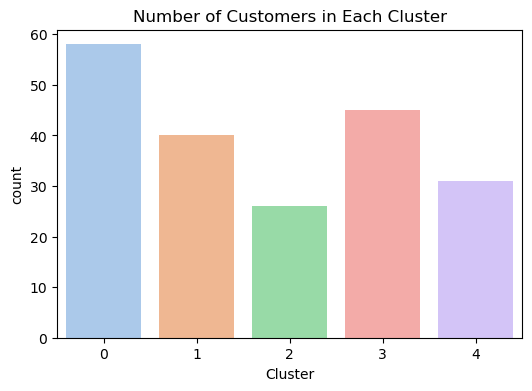

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='Cluster', data=df, palette='pastel')
plt.title('Number of Customers in Each Cluster')
plt.show()


Violin Plots per Cluster

C:\Users\anufn\AppData\Local\Temp\ipykernel_19288\3705389482.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='muted')


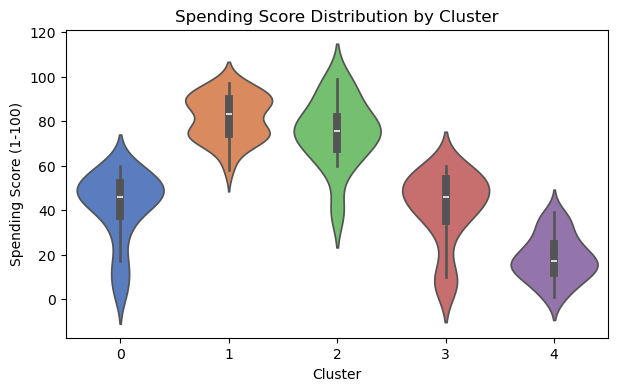

In [15]:
# Spending Score by Cluster
plt.figure(figsize=(7,4))
sns.violinplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='muted')
plt.title('Spending Score Distribution by Cluster')
plt.show()


3D PCA plots for clear cluster separation visuals.

Silhouette analysis to validate the model’s performance.

Radar charts to profile customer segments intuitively.

Faceted plots for demographic insights (e.g., AgeGroup).

Cluster heatmaps for comparison of feature means.

3D Cluster Visualization

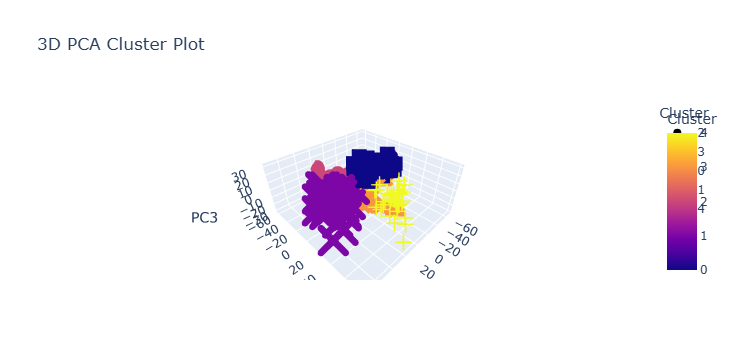

In [18]:
from sklearn.decomposition import PCA
import plotly.express as px

# Reduce dimensions if more than 3 features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
pca = PCA(n_components=3)
pcs = pca.fit_transform(X)
df[['PC1','PC2','PC3']] = pcs

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
                    color='Cluster', symbol='Cluster',
                    title='3D PCA Cluster Plot')
fig.show()


Silhouette Analysis

Mean Silhouette Score: 0.408


C:\Users\anufn\AppData\Local\Temp\ipykernel_19288\4285251996.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




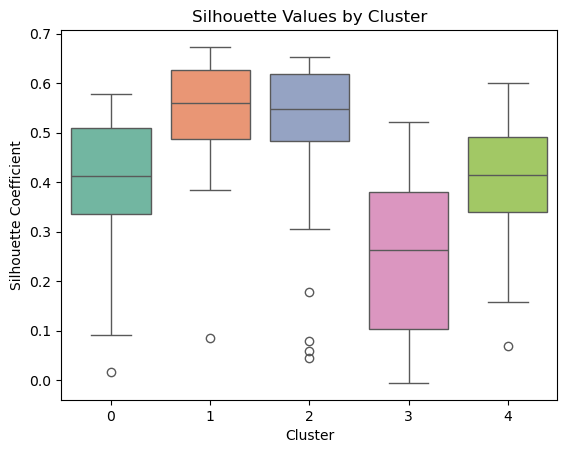

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score

X_scaled = scaler.fit_transform(df[features])
cluster_labels = df['Cluster']
score = silhouette_score(X_scaled, cluster_labels)
print(f"Mean Silhouette Score: {score:.3f}")

sample_silhouette = silhouette_samples(X_scaled, cluster_labels)
df['silhouette'] = sample_silhouette

sns.boxplot(x='Cluster', y='silhouette', data=df, palette='Set2')
plt.title('Silhouette Values by Cluster')
plt.ylabel('Silhouette Coefficient')
plt.show()


Radar (Spider) Chart for Segment Profiling

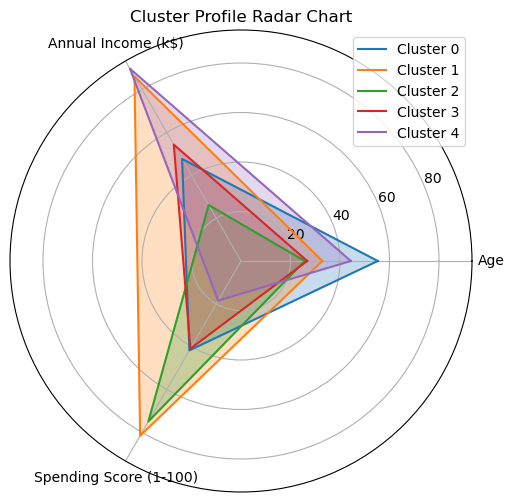

In [20]:
import numpy as np

cluster_summary = df.groupby('Cluster')[features].mean()
categories = list(cluster_summary.columns)
N = len(categories)

angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
for i, row in cluster_summary.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), categories)
plt.title('Cluster Profile Radar Chart')
plt.legend(loc='upper right')
plt.show()


Faceted Plots: Income vs Spending by Age Group

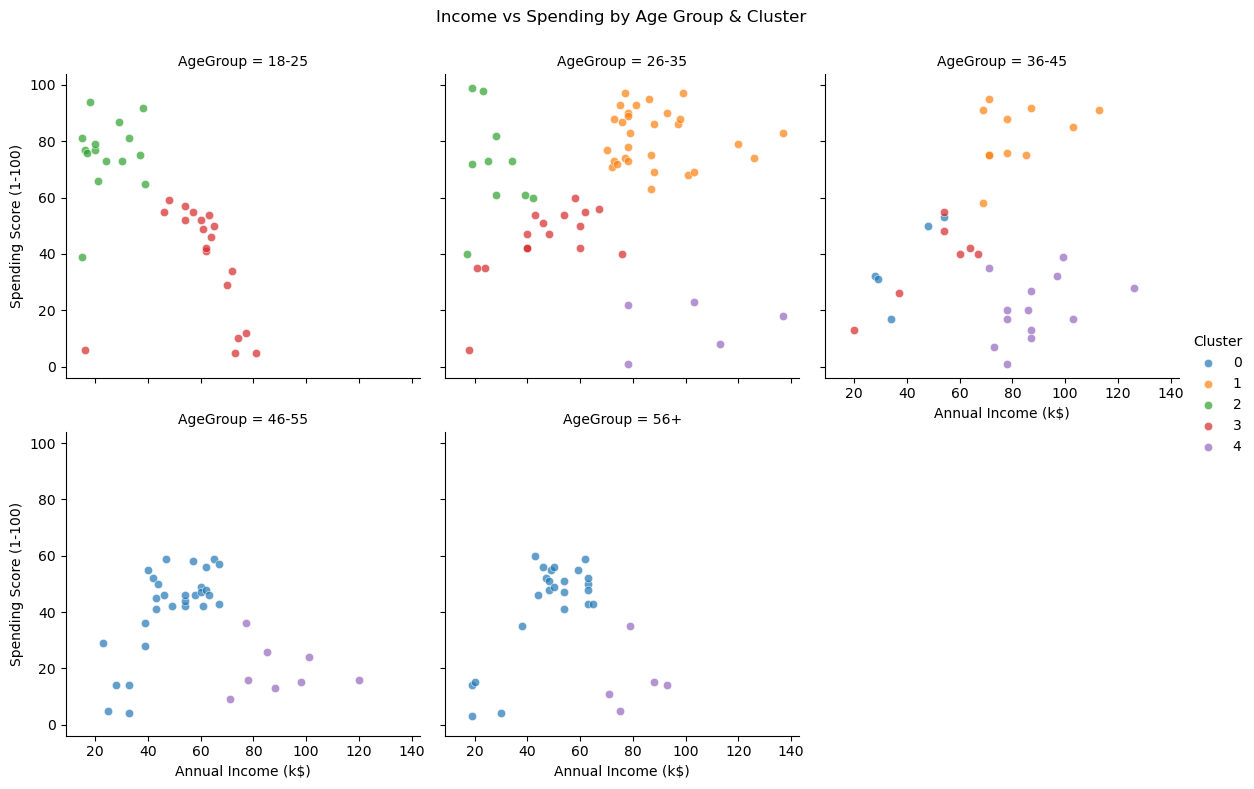

In [21]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18,25,35,45,55,70], labels=['18-25','26-35','36-45','46-55','56+'])
g = sns.FacetGrid(df, col='AgeGroup', hue='Cluster', col_wrap=3, height=4, palette='tab10')
g.map(sns.scatterplot, 'Annual Income (k$)', 'Spending Score (1-100)', alpha=0.7)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Income vs Spending by Age Group & Cluster')
plt.show()


Heatmap of Feature Means per Cluster

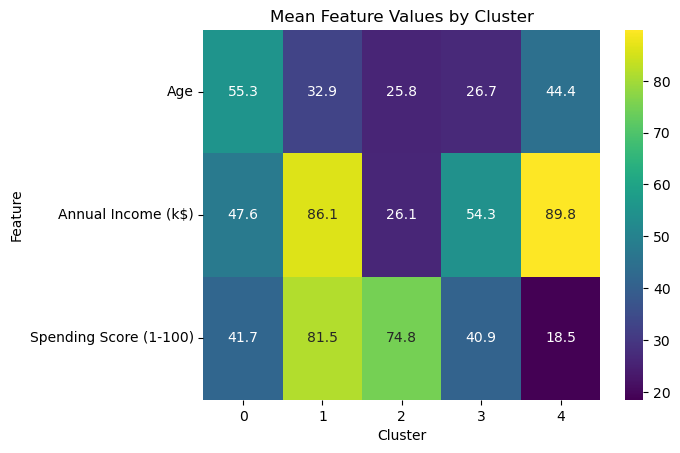

In [22]:
summary = df.groupby('Cluster')[features].mean().T
sns.heatmap(summary, annot=True, fmt='.1f', cmap='viridis')
plt.title('Mean Feature Values by Cluster')
plt.ylabel('Feature')
plt.xlabel('Cluster')
plt.show()
